In [1]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [5]:
df['not.fully.paid'].isnull().mean()

0.0

In [6]:
df1=pd.get_dummies(df, columns=['purpose'])

In [7]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])

In [8]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [9]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

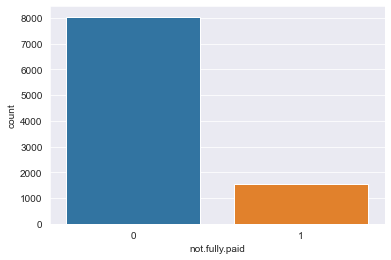

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

In [11]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()

In [12]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [13]:
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

In [14]:
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

Random over-sampling:
0    8045
1    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

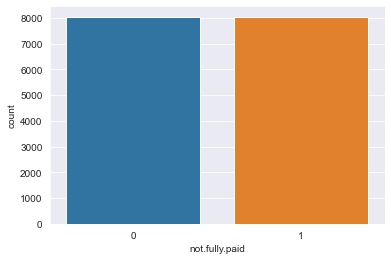

In [15]:
#df_test_over['not.fully.paid'].value_counts().plot(kind='bar', title='Count (not.fully.paid)')

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

<AxesSubplot:>

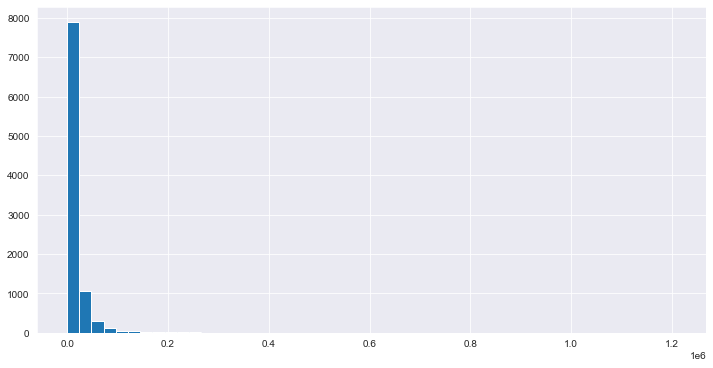

In [16]:
df['revol.bal'].hist(figsize=[12,6], bins=50)

In [17]:
df1=pd.get_dummies(df, columns=['purpose'])

Text(0.5, 0, 'FICO')

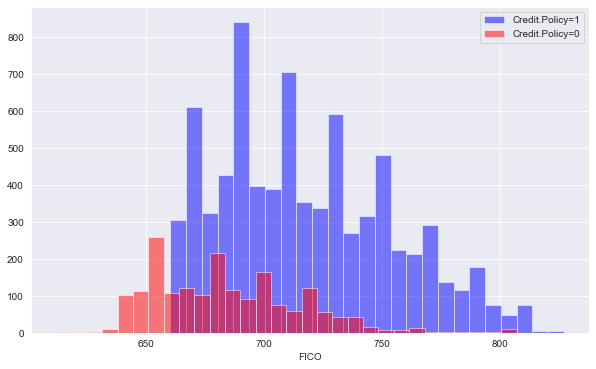

In [18]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

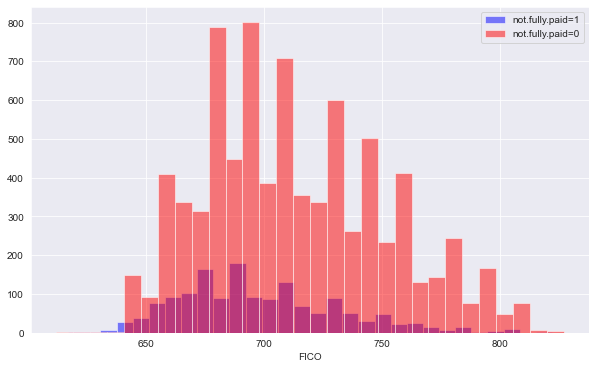

In [19]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

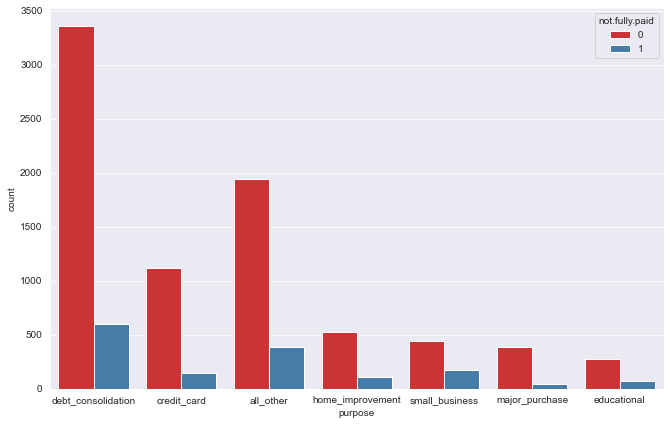

In [20]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

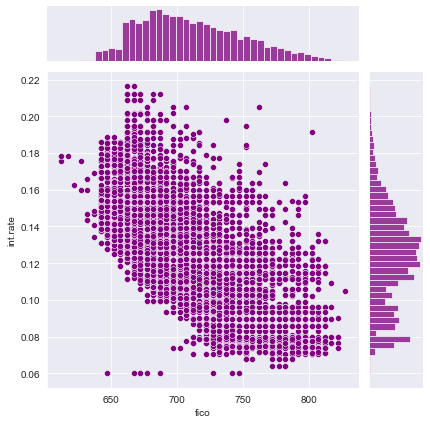

In [21]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

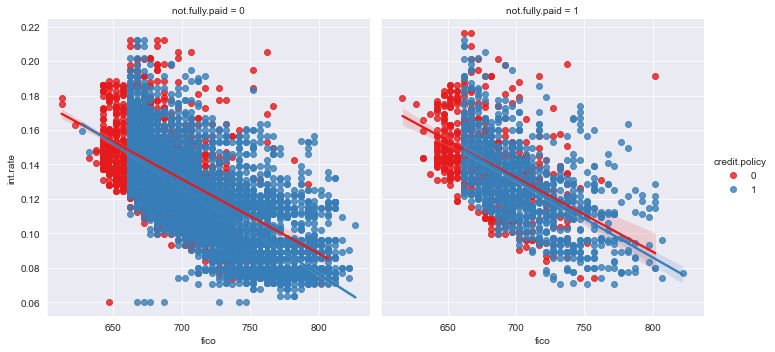

In [22]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [23]:
cat_feats = ['purpose']
#cat_feats =df_test_over

In [24]:
#final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)

In [25]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 4521
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [26]:
final_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.291025,0.049153,0.009030,-0.108751,0.372725,0.092633,-0.193714,-0.095298,-0.548145,-0.058398,-0.053493,-0.200468,0.010773,0.026781,-0.036027,-0.002826,0.037066,-0.010504
int.rate,-0.291025,1.000000,0.269119,0.079662,0.202698,-0.682557,-0.100627,0.081933,0.417548,0.189314,0.144852,0.113429,0.222286,-0.040691,0.083909,-0.018145,-0.039374,-0.054708,0.181828
installment,0.049153,0.269119,1.000000,0.478102,0.034769,0.109034,0.189135,0.260617,0.044717,-0.003893,0.003983,-0.020054,0.062116,0.013939,0.113154,-0.096651,0.032365,-0.039216,0.191145
log.annual.inc,0.009030,0.079662,0.478102,1.000000,-0.017244,0.098567,0.340828,0.396329,0.072539,0.047451,0.019390,0.014412,-0.047621,0.082274,-0.032761,-0.118709,0.101735,-0.024588,0.126326
dti,-0.108751,0.202698,0.034769,-0.017244,1.000000,-0.218120,0.097642,0.172922,0.313878,0.035959,-0.031243,0.023944,0.059144,0.077567,0.162934,-0.023584,-0.080389,-0.080563,-0.060280
fico,0.372725,-0.682557,0.109034,0.098567,-0.218120,1.000000,0.261134,0.011971,-0.499160,-0.186881,-0.208111,-0.158988,-0.212915,-0.009966,-0.141440,-0.011804,0.090119,0.059725,0.063458
days.with.cr.line,0.092633,-0.100627,0.189135,0.340828,0.097642,0.261134,1.000000,0.262220,0.008835,-0.011774,0.083176,0.068312,-0.035840,0.064318,-0.010319,-0.043871,0.065966,-0.038959,0.051348
revol.bal,-0.193714,0.081933,0.260617,0.396329,0.172922,0.011971,0.262220,1.000000,0.153299,0.030692,-0.025424,-0.028378,0.069244,0.048397,-0.015436,-0.024256,-0.011440,-0.057340,0.121446
revol.util,-0.095298,0.417548,0.044717,0.072539,0.313878,-0.499160,0.008835,0.153299,1.000000,-0.026729,-0.051499,0.072879,0.122309,0.082985,0.192275,-0.056589,-0.100444,-0.123012,-0.056304
inq.last.6mths,-0.548145,0.189314,-0.003893,0.047451,0.035959,-0.186881,-0.011774,0.030692,-0.026729,1.000000,0.002122,0.091505,0.174606,-0.036083,-0.058928,0.039334,0.067815,-0.008275,0.033117


<AxesSubplot:>

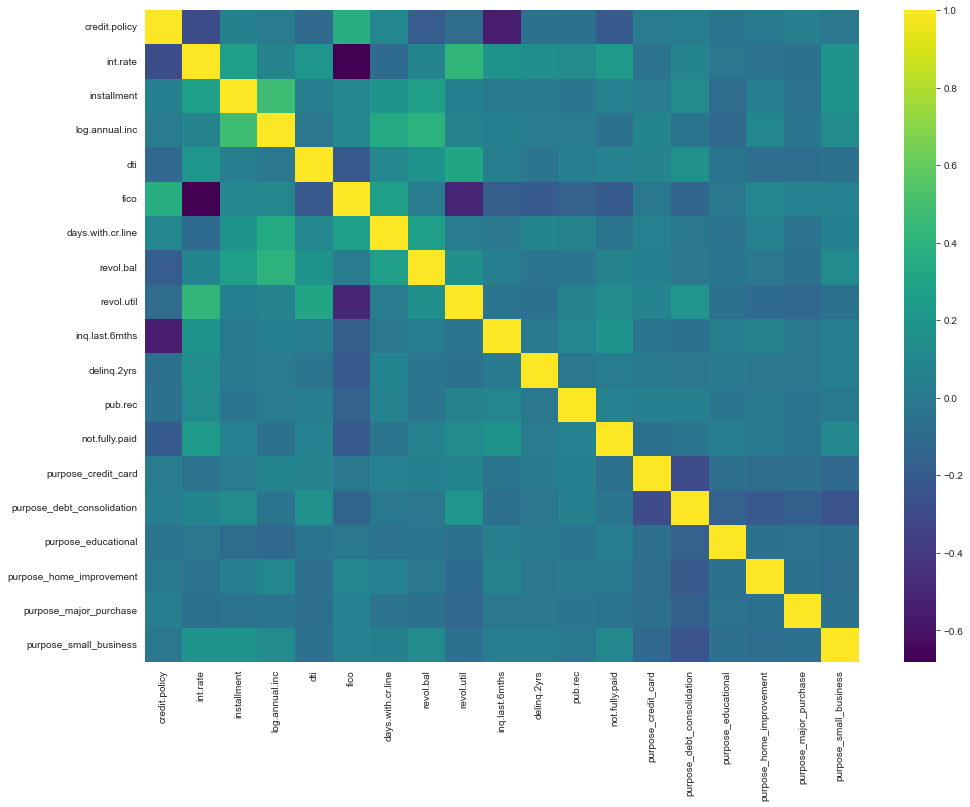

In [27]:
plt.figure(
        figsize=[16,12]
)

sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [28]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True)
#We only focus on the grids of yellow or very light green. After comparing with the feature description again,  revol.bal,day.with.cr.line,installment can repsent by annual income. revol.util can repsent by int.rate,  

In [29]:
final_data.isnull().mean()

credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

In [30]:
#to_train = df1[df1['not.fully.paid'].isin([0,1])]
#to_pred = df1[df1['not.fully.paid'] == 2]

to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

In [31]:
X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(11263, 15)

In [34]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [35]:
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 2s 14ms/step - loss: 0.6736 - accuracy: 0.5959 - val_loss: 0.6592 - val_accuracy: 0.5993
Epoch 2/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6474 - accuracy: 0.6190 - val_loss: 0.6518 - val_accuracy: 0.6043
Epoch 3/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6426 - accuracy: 0.6206 - val_loss: 0.6492 - val_accuracy: 0.6000
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6391 - accuracy: 0.6271 - val_loss: 0.6473 - val_accuracy: 0.6087
Epoch 5/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6368 - accuracy: 0.6284 - val_loss: 0.6458 - val_accuracy: 0.6111
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6351 - accuracy: 0.6323 - val_loss: 0.6456 - val_accuracy: 0.6111
Epoch 7/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6339 - accuracy: 0.6362 - val_loss: 0.6507 - val_accuracy: 0.6126
Epoch 8/200


Epoch 59/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5785 - accuracy: 0.6827 - val_loss: 0.6207 - val_accuracy: 0.6534
Epoch 60/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5792 - accuracy: 0.6823 - val_loss: 0.6220 - val_accuracy: 0.6495
Epoch 61/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5764 - accuracy: 0.6837 - val_loss: 0.6184 - val_accuracy: 0.6549
Epoch 62/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.6856 - val_loss: 0.6203 - val_accuracy: 0.6532
Epoch 63/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.6802 - val_loss: 0.6174 - val_accuracy: 0.6582
Epoch 64/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5742 - accuracy: 0.6907 - val_loss: 0.6163 - val_accuracy: 0.6607
Epoch 65/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5726 - accuracy: 0.6879 - val_loss: 0.6190 - val_accuracy: 0.6513
Epoch 

44/44 [==============================] - 0s 5ms/step - loss: 0.5343 - accuracy: 0.7154 - val_loss: 0.6042 - val_accuracy: 0.6737
Epoch 117/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5315 - accuracy: 0.7198 - val_loss: 0.6026 - val_accuracy: 0.6718
Epoch 118/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5291 - accuracy: 0.7233 - val_loss: 0.6024 - val_accuracy: 0.6774
Epoch 119/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5319 - accuracy: 0.7185 - val_loss: 0.6045 - val_accuracy: 0.6714
Epoch 120/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5341 - accuracy: 0.7192 - val_loss: 0.6142 - val_accuracy: 0.6770
Epoch 121/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5316 - accuracy: 0.7188 - val_loss: 0.6007 - val_accuracy: 0.6810
Epoch 122/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5275 - accuracy: 0.7240 - val_loss: 0.6061 - val_accuracy: 0.6731
Epoch 123/200

44/44 [==============================] - 0s 6ms/step - loss: 0.4951 - accuracy: 0.7440 - val_loss: 0.5918 - val_accuracy: 0.6928
Epoch 174/200
44/44 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.7458 - val_loss: 0.5932 - val_accuracy: 0.6932
Epoch 175/200
44/44 [==============================] - 0s 6ms/step - loss: 0.4916 - accuracy: 0.7470 - val_loss: 0.5930 - val_accuracy: 0.6849
Epoch 176/200
44/44 [==============================] - 0s 5ms/step - loss: 0.4927 - accuracy: 0.7455 - val_loss: 0.5867 - val_accuracy: 0.6938
Epoch 177/200
44/44 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7462 - val_loss: 0.5946 - val_accuracy: 0.6932
Epoch 178/200
44/44 [==============================] - 0s 5ms/step - loss: 0.4897 - accuracy: 0.7440 - val_loss: 0.5952 - val_accuracy: 0.6913
Epoch 179/200
44/44 [==============================] - 0s 5ms/step - loss: 0.4870 - accuracy: 0.7479 - val_loss: 0.5878 - val_accuracy: 0.6979
Epoch 180/200

<AxesSubplot:>

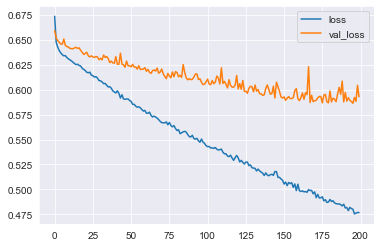

In [36]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting 

In [37]:
predictions = model.predict(X_test)
classes_x=np.argmax(predictions,axis=1)

print(
        confusion_matrix(y_test,classes_x), 
        '\n', 
        classification_report(y_test,classes_x)
)

[[2437    0]
 [2390    0]] 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2437
           1       0.00      0.00      0.00      2390

    accuracy                           0.50      4827
   macro avg       0.25      0.50      0.34      4827
weighted avg       0.25      0.50      0.34      4827



In [38]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 2s 12ms/step - loss: 0.6934 - binary_accuracy: 0.5395 - val_loss: 0.6736 - val_binary_accuracy: 0.5995
Epoch 2/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6659 - binary_accuracy: 0.5998 - val_loss: 0.6588 - val_binary_accuracy: 0.6076
Epoch 3/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6608 - binary_accuracy: 0.6059 - val_loss: 0.6551 - val_binary_accuracy: 0.6138
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6545 - binary_accuracy: 0.6222 - val_loss: 0.6522 - val_binary_accuracy: 0.6058
Epoch 5/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6513 - binary_accuracy: 0.6124 - val_loss: 0.6507 - val_binary_accuracy: 0.6101
Epoch 6/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6475 - binary_accuracy: 0.6227 - val_loss: 0.6485 - val_binary_accuracy: 0.6124
Epoch 7/200
44/44 [==============================] - 0s 7ms/step - lo

44/44 [==============================] - 0s 7ms/step - loss: 0.6168 - binary_accuracy: 0.6530 - val_loss: 0.6279 - val_binary_accuracy: 0.6437
Epoch 54/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6155 - binary_accuracy: 0.6522 - val_loss: 0.6290 - val_binary_accuracy: 0.6418
Epoch 55/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6181 - binary_accuracy: 0.6503 - val_loss: 0.6280 - val_binary_accuracy: 0.6468
Epoch 56/200
44/44 [==============================] - 0s 10ms/step - loss: 0.6177 - binary_accuracy: 0.6524 - val_loss: 0.6264 - val_binary_accuracy: 0.6455
Epoch 57/200
44/44 [==============================] - 0s 8ms/step - loss: 0.6139 - binary_accuracy: 0.6601 - val_loss: 0.6270 - val_binary_accuracy: 0.6389
Epoch 58/200
44/44 [==============================] - 0s 9ms/step - loss: 0.6153 - binary_accuracy: 0.6539 - val_loss: 0.6257 - val_binary_accuracy: 0.6497
Epoch 59/200
44/44 [==============================] - 0s 9ms/step - loss: 0.

44/44 [==============================] - 0s 7ms/step - loss: 0.5942 - binary_accuracy: 0.6748 - val_loss: 0.6104 - val_binary_accuracy: 0.6627
Epoch 106/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5928 - binary_accuracy: 0.6731 - val_loss: 0.6078 - val_binary_accuracy: 0.6621
Epoch 107/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5933 - binary_accuracy: 0.6730 - val_loss: 0.6087 - val_binary_accuracy: 0.6613
Epoch 108/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5938 - binary_accuracy: 0.6729 - val_loss: 0.6077 - val_binary_accuracy: 0.6634
Epoch 109/200
44/44 [==============================] - 0s 7ms/step - loss: 0.5903 - binary_accuracy: 0.6765 - val_loss: 0.6090 - val_binary_accuracy: 0.6621
Epoch 110/200
44/44 [==============================] - 0s 7ms/step - loss: 0.5907 - binary_accuracy: 0.6765 - val_loss: 0.6084 - val_binary_accuracy: 0.6586
Epoch 111/200
44/44 [==============================] - 0s 7ms/step - los

44/44 [==============================] - 0s 10ms/step - loss: 0.5711 - binary_accuracy: 0.6932 - val_loss: 0.5921 - val_binary_accuracy: 0.6799
Epoch 158/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5704 - binary_accuracy: 0.6918 - val_loss: 0.5939 - val_binary_accuracy: 0.6841
Epoch 159/200
44/44 [==============================] - 0s 7ms/step - loss: 0.5709 - binary_accuracy: 0.6932 - val_loss: 0.5909 - val_binary_accuracy: 0.6820
Epoch 160/200
44/44 [==============================] - 0s 7ms/step - loss: 0.5691 - binary_accuracy: 0.6921 - val_loss: 0.5909 - val_binary_accuracy: 0.6870
Epoch 161/200
44/44 [==============================] - 0s 7ms/step - loss: 0.5648 - binary_accuracy: 0.6937 - val_loss: 0.5942 - val_binary_accuracy: 0.6797
Epoch 162/200
44/44 [==============================] - 0s 7ms/step - loss: 0.5699 - binary_accuracy: 0.6958 - val_loss: 0.5909 - val_binary_accuracy: 0.6781
Epoch 163/200
44/44 [==============================] - 0s 7ms/step - lo

<AxesSubplot:>

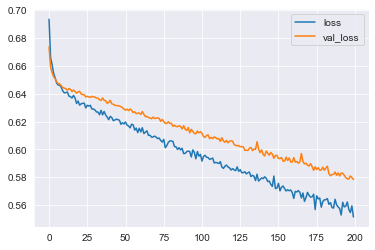

In [39]:
#The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model

pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [40]:
predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')
predict_classes=np.argmax(predictions_new,axis=1)

print(
        confusion_matrix(y_test,predict_classes), 
        '\n', 
        classification_report(y_test,predict_classes)
)

[[2437    0]
 [2390    0]] 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2437
           1       0.00      0.00      0.00      2390

    accuracy                           0.50      4827
   macro avg       0.25      0.50      0.34      4827
weighted avg       0.25      0.50      0.34      4827

